# Cognitive Portrait

Hello! Let's create some **Science Art** together with this **Cogntivie Portrait** challenge!

We will try to create X-Man!

The goal of the challenge would be to use **[Face API](https://docs.microsoft.com/azure/cognitive-services/face/overview/?wt.mc_id=aiapril-github-dmitryso)** to create artistic pictures in the genere of **Generative Science Art**.
More details you can find [here](CognitivePortrait.ipynb).

### Some pre-requisites
Firstly, we need OpenCV for working with images. Also, we want `matplotlib` to show our results.

In [1]:
import sys
!{sys.executable} -m pip install --quiet opencv-python matplotlib
!{sys.executable} -m pip install pyOpenSSL cryptography
!{sys.executable} -m pip install --quiet azure-cognitiveservices-vision-face
import cv2
import matplotlib.pyplot as plt
import glob, os

You should consider upgrading via the '/Users/linuxoid/.virtualenvs/dl4cv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/linuxoid/.virtualenvs/dl4cv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/linuxoid/.virtualenvs/dl4cv/bin/python3 -m pip install --upgrade pip' command.


### Extracting Facial Landmarks

To extract facial landmarks, we will use [Microsoft Face API](https://azure.microsoft.com/services/cognitive-services/face/?wt.mc_id=crpyface-github-dmitryso). It provides a simple REST API that can extract a lot of useful information from the face image, including those landmarks:

![Facial Landmarks](https://raw.githubusercontent.com/shwars/FaceArt/master/notebooks/img/landmarks.jpg)

For using Face API, we need a key and endpoint URL.
There are many ways to obtain Face API Key, but I will use the simpliest way:
- Requesting 7 days free trial key [here](https://azure.microsoft.com/try/cognitive-services/my-apis/?api=face-api&wt.mc_id=crpyface-github-dmitryso).

**Important:** If you use trial key, your Face API will have some limitations, in terms of number of images you can process, and frequency of API calls (not more than 20 calls per minute). In order to make things work, we would need to insert some pauses in between calls, when using API on a series of images.

After you get the key and endpoint, please insert them into the cell below. There would typically be two keys given on the portal, you can use any one of them.

In [2]:
key = 'b26c6bf5497d42dda79205134d8d43a8'
endpoint = 'https://westcentralus.api.cognitive.microsoft.com' 

Most of the calls of the Face API are done through the static module `cognitive_face`, which we will call `cf` for brevity.

In [3]:
import azure.cognitiveservices.vision.face as cf
from msrest.authentication import CognitiveServicesCredentials
cli = cf.FaceClient(endpoint,CognitiveServicesCredentials(key))

The main function for face detection is called `face.detect_with_url` or `face.detect_with_stream`. It can extract a lot of useful information from the face, depending on the parameters that you specify - in our case we would need facial landmarks:

In [4]:
face_url = 'https://2016.dotnext-piter.ru/assets/images/people/soshnikov.jpg'
res = cli.face.detect_with_url(face_url,return_face_landmarks=True)
print(res[0].face_landmarks.as_dict())

{'pupil_left': {'x': 112.6, 'y': 126.7}, 'pupil_right': {'x': 170.9, 'y': 118.9}, 'nose_tip': {'x': 148.7, 'y': 158.4}, 'mouth_left': {'x': 121.6, 'y': 182.6}, 'mouth_right': {'x': 177.8, 'y': 172.1}, 'eyebrow_left_outer': {'x': 84.1, 'y': 120.3}, 'eyebrow_left_inner': {'x': 122.9, 'y': 110.1}, 'eye_left_outer': {'x': 103.3, 'y': 128.9}, 'eye_left_top': {'x': 112.3, 'y': 122.8}, 'eye_left_bottom': {'x': 113.7, 'y': 131.4}, 'eye_left_inner': {'x': 122.4, 'y': 126.7}, 'eyebrow_right_inner': {'x': 157.2, 'y': 106.3}, 'eyebrow_right_outer': {'x': 192.1, 'y': 106.6}, 'eye_right_inner': {'x': 162.7, 'y': 120.8}, 'eye_right_top': {'x': 171.3, 'y': 115.0}, 'eye_right_bottom': {'x': 172.7, 'y': 123.5}, 'eye_right_outer': {'x': 181.5, 'y': 118.5}, 'nose_root_left': {'x': 135.4, 'y': 126.3}, 'nose_root_right': {'x': 151.5, 'y': 124.3}, 'nose_left_alar_top': {'x': 131.9, 'y': 147.4}, 'nose_right_alar_top': {'x': 158.4, 'y': 143.8}, 'nose_left_alar_out_tip': {'x': 128.2, 'y': 159.3}, 'nose_right_al

## Getting Some Images

In this repository, sample images of Bill Gates are available in  `images/gates` directory and sample images of Angelina Joley are available in  `images/joley` directory.  

In [5]:
first_path = 'images/gates/*'
second_path = 'images/joley/*'

In [6]:
def imread(fn):
    im = cv2.imread(fn)
    return cv2.cvtColor(im,cv2.COLOR_BGR2RGB) if im is not None else None

For our further experiments, let's load 10 first images, and run them through Face API to obtain facial landmarks. We will save the images into `images` array, and landmarks data into `imagepoints`.

In [7]:
def processing(path, filenames, images, imagepoints, evens = []):
    fnames = glob.glob(path)
    i = 1
    for fn in fnames[0:9]:
        print("Processing {}".format(fn))
        with open(fn,'rb') as f:
            res = cli.face.detect_with_stream(f, return_face_landmarks=True)
        if len(res) > 0:
            filenames.append(fn)
            images.append(imread(fn))
            imagepoints.append(res[0].face_landmarks.as_dict())
            evens.append(i)
            if i == 3: i = 0
            i += 1

In [8]:
filenames = []
images = []
imagepoints = []

filenames2 = []
images2 = []
imagepoints2 = []
evens = []

cli.face.detect_with_url(face_url)
processing(first_path, filenames, images, imagepoints)
processing(second_path, filenames2, images2, imagepoints2, evens)

Processing images/gates/gates_36.jpg
Processing images/gates/gates_22.jpg
Processing images/gates/gates_23.jpg
Processing images/gates/gates_37.jpg
Processing images/gates/gates_21.jpg
Processing images/gates/gates_35.jpg
Processing images/gates/gates_34.jpg
Processing images/gates/gates_24.jpg
Processing images/gates/gates_30.jpg
Processing images/joley/joley1.jpg
Processing images/joley/joley3.jpg
Processing images/joley/joley2.jpg
Processing images/joley/joley6.jpg
Processing images/joley/joley7.jpg
Processing images/joley/joley5.jpg
Processing images/joley/joley4.jpg
Processing images/joley/joley10.jpg
Processing images/joley/joley9.jpg


Let's check our downloaded pictures.

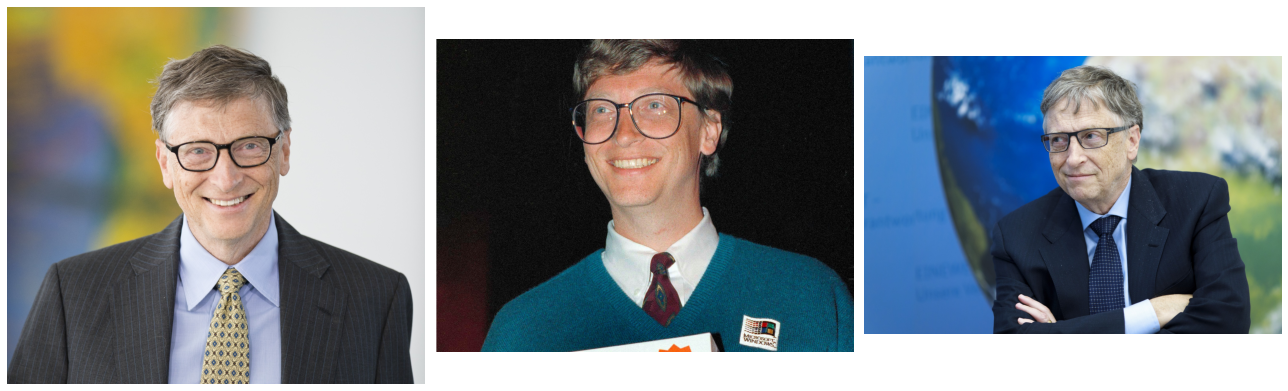

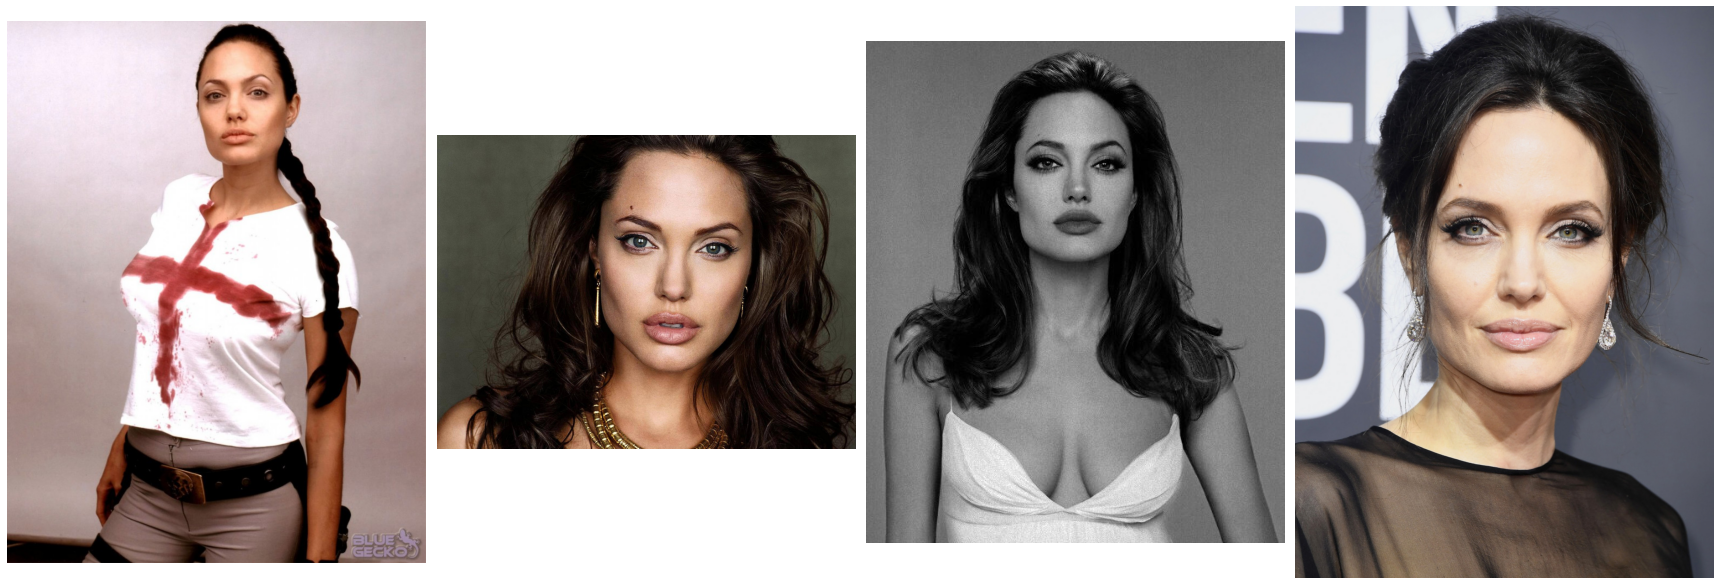

In [9]:
def display_images(l):
    n = len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

display_images(images[5:])
display_images(images2[5:])

### Affine Transformations

The function to rotate our images to the fixes eyes-mouth position is defined below. We have a bool flag for choosing the way of creation X-Man Face: two heads with one mouth or x-man with additional two simmetrical heads below the main head.

In [10]:
import numpy as np

teeth_target = np.float32([(750.0,250.0),(1050.0,250.0),(900.0,550.0)])

xmen_target_left = np.float32([(500.0,350.0),(750.0,150.0),(950.0,450.0)])
xmen_target_right = np.float32([(1000.0,150.0),(1350.0,350.0),(850.0,450.0)])
main_target = np.float32([(750.0,150.0),(1050.0,150.0),(900.0,450.0)])


def transformation(img, attrs, f, showTeeth):
    mc_x = (attrs['mouth_left']['x'] + attrs['mouth_right']['x']) / 2.0
    mc_y = (attrs['mouth_left']['y'] + attrs['mouth_right']['y']) / 2.0
    target_right = xmen_target_right
    target_left = xmen_target_left
    
    if showTeeth: target_left = teeth_target
        
    if not showTeeth and f % 3 == 0:
        tr = cv2.getAffineTransform(np.float32([(attrs['pupil_left']['x'],attrs['pupil_left']['y']),
                                         (attrs['pupil_right']['x'],attrs['pupil_right']['y']),
                                         (mc_x,mc_y)]), target_right)
    elif f & 1: 
        tr = cv2.getAffineTransform(np.float32([(attrs['pupil_left']['x'],attrs['pupil_left']['y']),
                                         (attrs['pupil_right']['x'],attrs['pupil_right']['y']),
                                         (mc_x,mc_y)]), target_left)
    else:
        tr = cv2.getAffineTransform(np.float32([(attrs['pupil_left']['x'],attrs['pupil_left']['y']),
                                             (attrs['pupil_right']['x'],attrs['pupil_right']['y']),
                                             (mc_x,mc_y)]), main_target)
    return cv2.warpAffine(img,tr,(1900,1000))


img_aligned_teeth = [transformation(i, a, f, True) for i, a, f in zip(images, imagepoints, evens)]
img_aligned = [transformation(i, a, f, False) for i, a, f in zip(images2, imagepoints2, evens)]

For more interesting results for two heads, we will add fun color.

In [11]:
def rotate_and_color(img, num, color):
    if num & 1:
        img = cv2.flip(img, 0)
        if color:
            img = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_BGR2HSV), cv2.COLOR_BGR2HSV)
    return img

num = 1
images_with_teeth = []
for img in img_aligned_teeth:
    images_with_teeth.append(rotate_and_color(img, num, color = True))
    num += 1

images_xman = [rotate_and_color(img, num, color = False) for img, num in zip(img_aligned, evens)] 

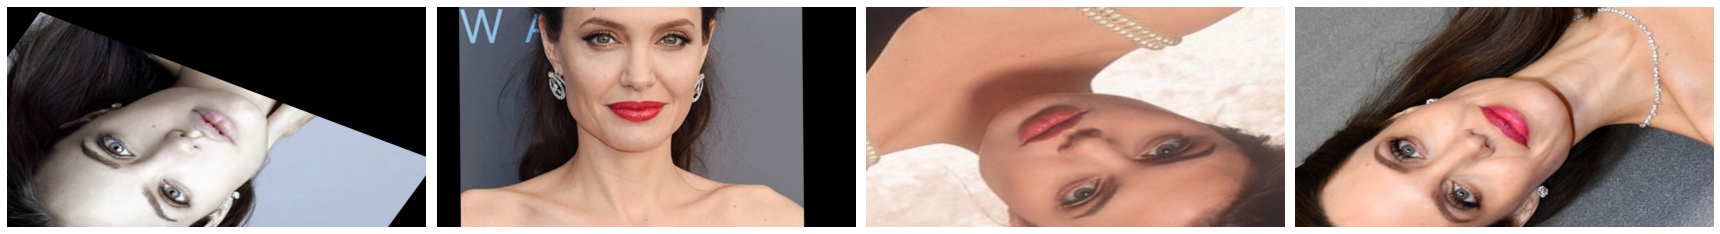

In [12]:
display_images(images_xman[0:4])

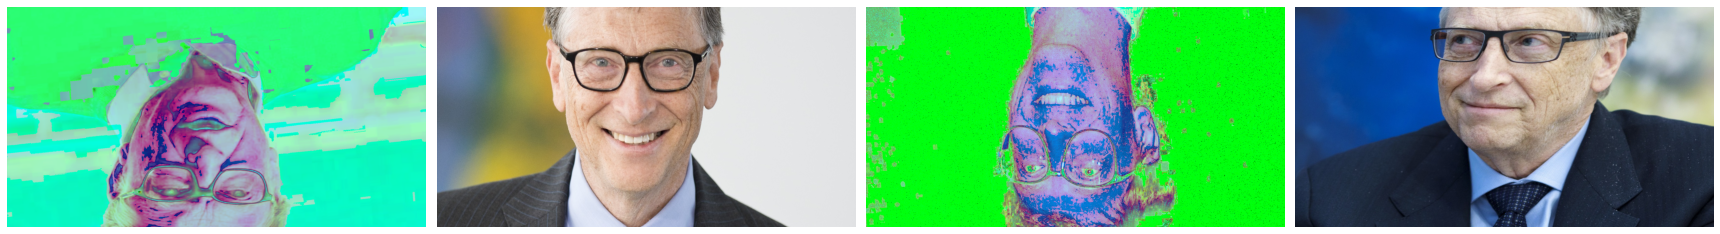

In [13]:
display_images(images_with_teeth[4:9])

## Image Blending

To blend images together, we just calculate the average:

In [14]:
def merge(images,wts=None):
    res = np.zeros_like(images[0], dtype=np.float32)
    if wts is None:
        wts = np.ones(len(images))
    wts /= np.sum(wts)
    for n,i in enumerate(images):
        res += wts[n] * i.astype(np.float32)
    return res.astype(np.ubyte)

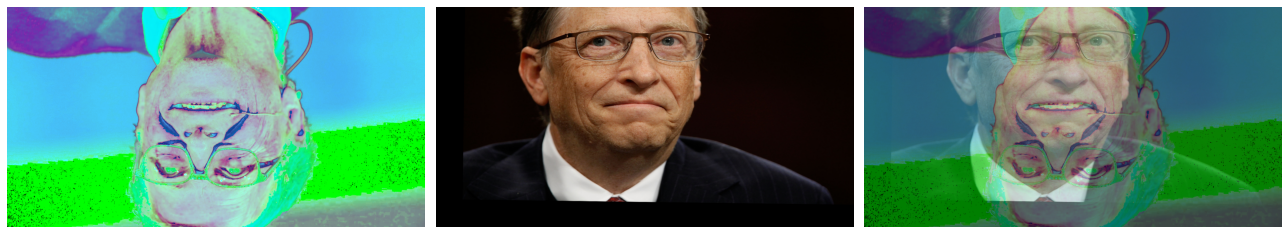

In [15]:
display_images([images_with_teeth[0], images_with_teeth[1], merge(images_with_teeth[0:2])])

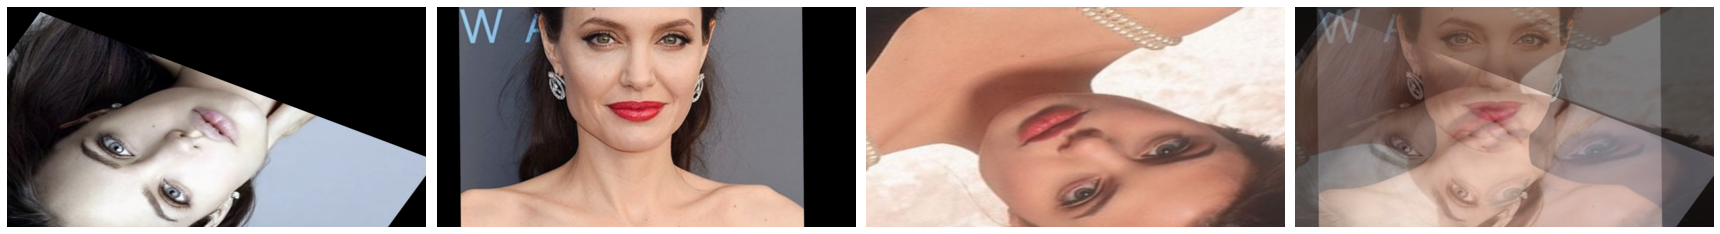

In [16]:
display_images([images_xman[0], images_xman[1], images_xman[2], merge(images_xman[0:3])])

Now let's merge all aligned images altogether and see what happens:

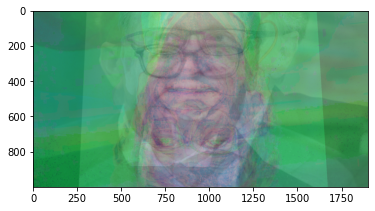

In [17]:
res1 = merge(images_with_teeth)
plt.imshow(res1)

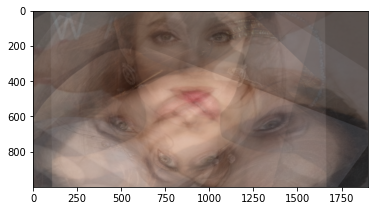

In [18]:
res2 = merge(images_xman)
plt.imshow(res2)

If this image does not look good, we can vary weights of different images, producing different results:

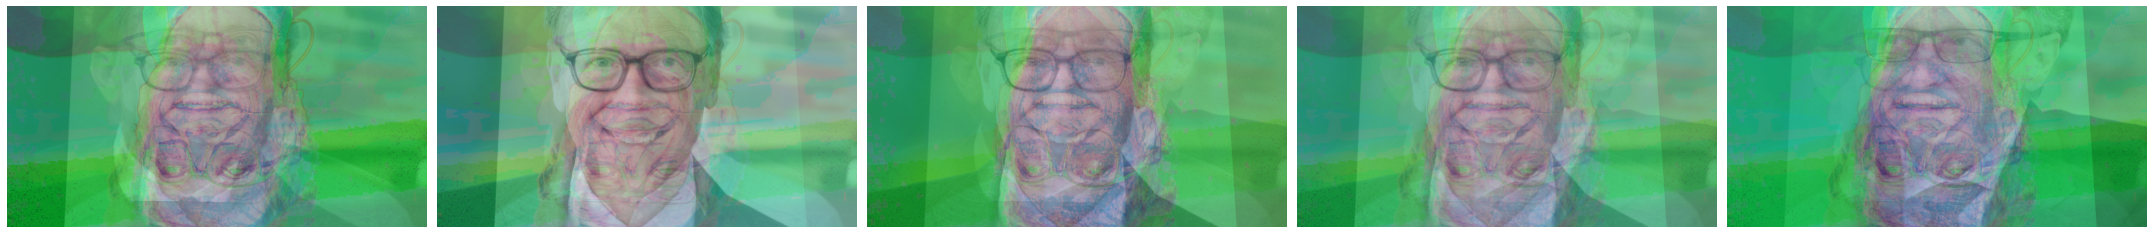

In [19]:
imgs = [merge(images_with_teeth, np.random.random(len(images_with_teeth))) for _ in range(5)]
display_images(imgs)

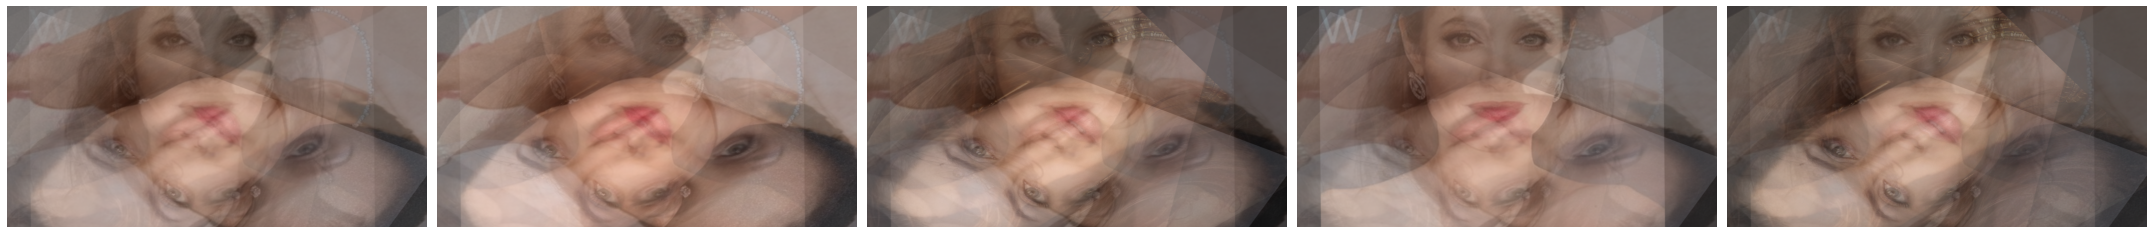

In [20]:
imgs = [merge(images_xman, np.random.random(len(images_xman))) for _ in range(5)]
display_images(imgs)

## Saving the result

I recommend to save the result into `results` directory, and to add quick description of the technique you used into `readme.md` file in the repo. To save the image, please execute the cell below:

In [21]:
cv2.imwrite('results/gates_with_teeth.jpg', res1)

True

In [22]:
cv2.imwrite('results/joley_x-man.jpg', cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))

True